# Natural Language Processing - Assignment 1

**Dataset Used:** Customer Reviews dataset from Yelp  

**Sourced From:** [Yelp Open Dataset](https://business.yelp.com/data/resources/open-dataset/)


In [104]:
import pandas as pd
import numpy as np

In [123]:
file_path = r'F:\desktop\NLP_Bootcamp\Yelp-JSON\Yelp JSON\yelp_dataset\yelp_academic_dataset_review.json'
chunks = []
max_rows = 1000  # About 1k reviews 
df = next(pd.read_json(file_path, lines=True, chunksize=1000))
print(f"Final dataset size: {len(df)} rows")
reviews_df = df[['text']].copy()
reviews_df.rename(columns={'text': 'review'}, inplace=True)
df.head()

Final dataset size: 1000 rows


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [124]:
#Lower Case Conversion of the Rows

reviews_df['review'] = reviews_df['review'].str.lower()
reviews_df.head()

,review
0,"if you decide to eat here, just be aware it is..."
1,i've taken a lot of spin classes over the year...
2,family diner. had the buffet. eclectic assortm...
3,"wow! yummy, different, delicious. our favo..."
4,cute interior and owner (?) gave us tour of up...


In [125]:
#Punctuation, Digits, Emoji, Excess WS removal
import re
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           "]+", flags=re.UNICODE)
reviews_df['review'] = reviews_df['review'].apply(lambda x: re.sub(r'\d+', '', re.sub(r'[^\w\s]', '', x)))
reviews_df['review'] = reviews_df['review'].apply(lambda x: re.sub(emoji_pattern, '', x).strip())
reviews_df.head()

,review
0,if you decide to eat here just be aware it is ...
1,ive taken a lot of spin classes over the years...
2,family diner had the buffet eclectic assortmen...
3,wow yummy different delicious our favorite...
4,cute interior and owner gave us tour of upcom...


In [126]:
#stop words removal

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def remove_stopwords(text, language):
    stop_words = set(stopwords.words(language))
    word_tokens = text.split()
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)
reviews_df['review'] = reviews_df['review'].apply(lambda x: remove_stopwords(x,"english"))
reviews_df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review
0,decide eat aware going take hours beginning en...
1,ive taken lot spin classes years nothing compa...
2,family diner buffet eclectic assortment large ...
3,wow yummy different delicious favorite lamb cu...
4,cute interior owner gave us tour upcoming pati...


In [127]:
# remove urls

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

reviews_df['review'] = reviews_df['review'].apply(lambda x: remove_urls(x))
reviews_df.head()

,review
0,decide eat aware going take hours beginning en...
1,ive taken lot spin classes years nothing compa...
2,family diner buffet eclectic assortment large ...
3,wow yummy different delicious favorite lamb cu...
4,cute interior owner gave us tour upcoming pati...


In [128]:
# removing html tags

html_tags_pattern = r'<.*?>'
reviews_df['review'] = reviews_df['review'].apply(lambda x: re.sub(html_tags_pattern, '', x))
reviews_df.head()


,review
0,decide eat aware going take hours beginning en...
1,ive taken lot spin classes years nothing compa...
2,family diner buffet eclectic assortment large ...
3,wow yummy different delicious favorite lamb cu...
4,cute interior owner gave us tour upcoming pati...


In [129]:
# stemming

from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

def stem_words(text):
    word_tokens = text.split()
    stems = [stemmer.stem(word) for word in word_tokens]
    return ' '.join(stems)
stemmed_df = pd.DataFrame()
stemmed_df['review'] = reviews_df['review'].apply(lambda x: stem_words(x))
stemmed_df.head()

,review
0,decid eat awar go take hour begin end tri mult...
1,ive taken lot spin class year noth compar clas...
2,famili diner buffet eclect assort larg chicken...
3,wow yummi differ delici favorit lamb curri kor...
4,cute interior owner gave us tour upcom patioro...


In [130]:
# lemmetisation
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_word(text):
    word_tokens = text.split()
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens]
    return ' '.join(lemmas)
processed_df = pd.DataFrame()
processed_df['review'] = reviews_df['review'].apply(lambda x: lemmatize_word(x))
processed_df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,review
0,decide eat aware go take hours begin end try m...
1,ive take lot spin class years nothing compare ...
2,family diner buffet eclectic assortment large ...
3,wow yummy different delicious favorite lamb cu...
4,cute interior owner give us tour upcoming pati...


In [131]:
# word tokenization
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
word_tokenized_df = pd.DataFrame()
word_tokenized_df['review'] = stemmed_df['review'].apply(lambda x: word_tokenize(x))
word_tokenized_df.head()


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,review
0,"[decid, eat, awar, go, take, hour, begin, end,..."
1,"[ive, taken, lot, spin, class, year, noth, com..."
2,"[famili, diner, buffet, eclect, assort, larg, ..."
3,"[wow, yummi, differ, delici, favorit, lamb, cu..."
4,"[cute, interior, owner, gave, us, tour, upcom,..."


In [132]:
# BOW
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(stemmed_df['review'])
feature_names = vectorizer.get_feature_names_out()
X_array = X.toarray()

print("Unique Word List: \n", feature_names)
print("Bag of Words Matrix: \n", X_array)
print(X_array.shape)

Unique Word List: 
 ['aaa' 'aah' 'abil' ... 'zurich' 'únicament' '三杯鸡']
Bag of Words Matrix: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(1000, 6310)


In [133]:
BOW_df = pd.DataFrame(data=X_array, columns=feature_names)
BOW_df.head()

,aaa,aah,abil,abl,abnorm,abovedo,absenc,absinth,absolut,absolutli,...,zeller,zeppol,zero,zest,ziggi,zone,zucchini,zurich,únicament,三杯鸡
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
# tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(stemmed_df['review'])
terms = tfidf_vectorizer.get_feature_names_out()
df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)

df.head()

,aaa,aah,abil,abl,abnorm,abovedo,absenc,absinth,absolut,absolutli,...,zeller,zeppol,zero,zest,ziggi,zone,zucchini,zurich,únicament,三杯鸡
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


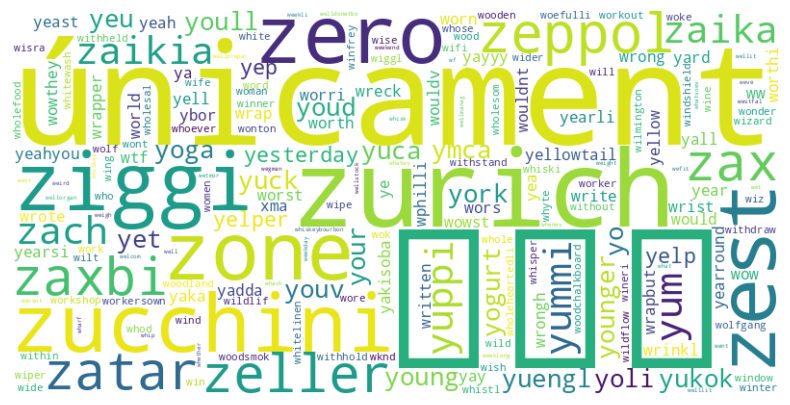

In [135]:
#word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(vectorizer.vocabulary_)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [136]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder
reviews_df['words'] = reviews_df['review'].apply(lambda x : word_tokenize(x))
all_words = reviews_df['words'].explode().reset_index(drop=True)
vocab = sorted(set(all_words))
word_array = np.array(all_words).reshape(-1, 1)

# Apply OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(word_array)

encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out())
encoded_df.head()

,x0_aaa,x0_aahed,x0_ability,x0_able,x0_abnormally,x0_abovedo,x0_absence,x0_absinthe,x0_absolute,x0_absolutely,...,x0_zellers,x0_zeppoles,x0_zero,x0_zest,x0_ziggy,x0_zone,x0_zucchini,x0_zurich,x0_únicamente,x0_三杯鸡
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
print((processed_df['review']))
processed_df['words'] = processed_df['review'].apply(lambda x : word_tokenize(x))

0      decide eat aware go take hours begin end try m...
1      ive take lot spin class years nothing compare ...
2      family diner buffet eclectic assortment large ...
3      wow yummy different delicious favorite lamb cu...
4      cute interior owner give us tour upcoming pati...
                             ...                        
995    recently vacation st petersburg family dooners...
996    cool bar attach alexander hotel several vintag...
997    hotel gem heart philadelphia cozy quaint charm...
998    take today colombian friend need satisfy crave...
999    friends get one available try love many fun do...
Name: review, Length: 1000, dtype: object


In [138]:
# word2vec

import gensim
from gensim.models import Word2Vec

cbow_model = Word2Vec(processed_df['words'], vector_size=100, window=5, min_count=1, sg=0, alpha=0.03, min_alpha=0.0007, epochs=100)
skipgram_model = Word2Vec(processed_df['words'], vector_size=100, window=5, min_count=1, sg=1, alpha=0.03, min_alpha=0.0007, epochs=100)

word_vectors_cbow = cbow_model.wv
cbow_vocab = cbow_model.wv.index_to_key
word_vectors_skipgram= skipgram_model.wv

print("First 40 words in CBOW Vocabulary:")
print(cbow_vocab[:40])


First 40 words in CBOW Vocabulary:
['get', 'place', 'go', 'food', 'good', 'great', 'time', 'come', 'like', 'order', 'service', 'one', 'make', 'would', 'back', 'try', 'really', 'love', 'also', 'take', 'say', 'us', 'even', 'want', 'staff', 'nice', 'wait', 'best', 'dont', 'give', 'price', 'look', 'im', 'always', 'friendly', 'ive', 'know', 'drink', 'could', 'think']


In [139]:
similarity_cbow = word_vectors_cbow.similarity('good', 'great')
print(f"Similarity between 'good' and 'great': {similarity_cbow} with CBOW")
similarity_skip = word_vectors_skipgram.similarity('good', 'great')
print(f"Similarity between 'good' and 'great': {similarity_skip} with Skip-Gram")

Similarity between 'good' and 'great': 0.484322190284729 with CBOW
Similarity between 'good' and 'great': 0.5402428507804871 with Skip-Gram
